# Neural Networks

We explore here the pist of Neural Networks. As these non-linear models are known of being high-performant, we hope to get better results than with the other models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")

In [3]:
from codes.functions import load_data

X_tr, X_te, y_tr, y_te = load_data()

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential, activations, initializers, optimizers, metrics, losses
from tensorflow.keras.layers import Dense

## A. Single layer

When we firstly set the learning rate by default 0.01, the validation and training curves oscillated. Thus, we decided to get a lower value for the learning rate and setting it to 0.001. 

According to this [website](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), the learning rate of a Stochastic Gradient Descent defines "how big are the steps the gradient descent makes in the direction of the minimum". By taking a smaller value for the learning rate, we allow our curves to be smoother. For the same purpose, we also set to 128 the size of the batches. 

In [5]:
model = Sequential()

model.add(Dense(
    units = 5, 
    activation = activations.softmax, 
    kernel_initializer = initializers.VarianceScaling(scale = 1, 
                                                      distribution = "truncated_normal", 
                                                      seed = 0),
    input_dim = 48,
    kernel_regularizer = tf.keras.regularizers.l2(0.1)
)
         )

model.compile(optimizer = optimizers.SGD(learning_rate = (0.001)),
              loss = losses.sparse_categorical_crossentropy,
              metrics = metrics.sparse_categorical_accuracy)

Metal device set to: Apple M4


2026-01-20 14:56:03.150833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-20 14:56:03.151054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.fit_transform(X_te)

In [7]:
history = model.fit(
    x = X_tr_rescaled, 
    y = y_tr, 
    validation_split = 0.2,
    batch_size = 128, 
    epochs = 25, 
    shuffle = True,
    verbose = 0)

2026-01-20 14:56:03.339315: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2026-01-20 14:56:03.433735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2026-01-20 14:56:06.013335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


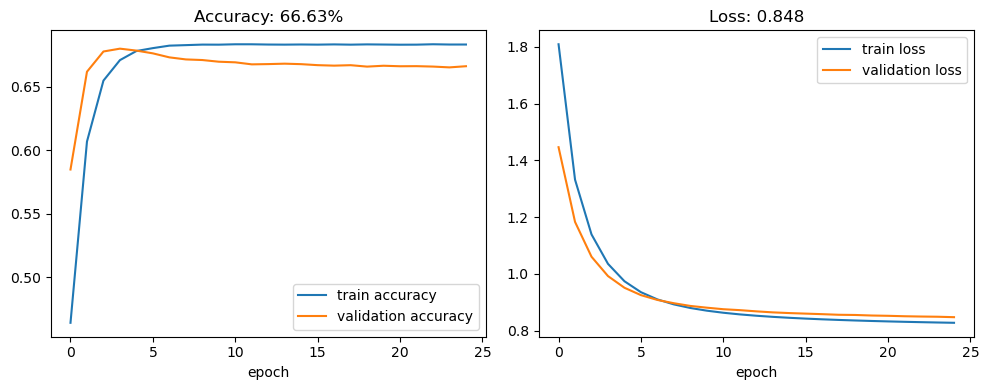

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

axes = axes.flatten()

axes[0].plot(history.history["sparse_categorical_accuracy"], label = "train accuracy")
axes[0].plot(history.history["val_sparse_categorical_accuracy"], label = "validation accuracy")
axes[0].set_xlabel("epoch")
axes[0].set_title("Accuracy: {:.2f}%".format(history.history["val_sparse_categorical_accuracy"][-1]*100))
axes[0].legend()

axes[1].plot(history.history["loss"], label = "train loss")
axes[1].plot(history.history["val_loss"], label = "validation loss")
axes[1].set_xlabel("epoch")
axes[1].set_title("Loss: {:.3f}".format(history.history["val_loss"][-1]))
axes[1].legend()

plt.tight_layout()
plt.show()

This model is not overfitting but get an accuracy of only around 66%, we were expecting more from this kind of model.

## B. Multi-layer Neural Network

Because we are not satisfied with the previous accuracy, we might check if we can improve it by building a much more complex network (which means increasing the number of neurons and layers).

We start by adding one layer followed by a dropout layer. We take the same learning rate for the Stochastic Gradient Descent.

In [9]:
from tensorflow.keras.layers import Dropout

multi_layer = Sequential()

multi_layer.add(
    Dense(
        units = 128, 
        activation = activations.relu, 
        input_dim = 48, 
        kernel_initializer = initializers.VarianceScaling(scale = 2, seed = 0),
        kernel_regularizer = tf.keras.regularizers.l2(0.1),
        name = "hidden_layer"
    )
)

multi_layer.add(
    Dropout(
        rate = 0.25, 
        seed = 0, 
        name = "dropout_layer", 
    )
)

multi_layer.add(
    Dense(
        units = 5, 
        activation = activations.softmax, 
        kernel_initializer = initializers.VarianceScaling(scale = 1, seed=0),
        kernel_regularizer = tf.keras.regularizers.l2(0.1),
        name = "output_layer"
    )
)   

In [10]:
multi_layer.compile(optimizer = optimizers.SGD(learning_rate = (0.001)), 
                loss = losses.sparse_categorical_crossentropy, 
                metrics = metrics.sparse_categorical_accuracy)

In [11]:
history_2 = multi_layer.fit(
    x=X_tr_rescaled,
    y = y_tr, 
    validation_split = 0.2, 
    batch_size = 128, 
    epochs = 25, 
    shuffle = True, 
    verbose = 0);

2026-01-20 14:57:20.667903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2026-01-20 14:57:23.484515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


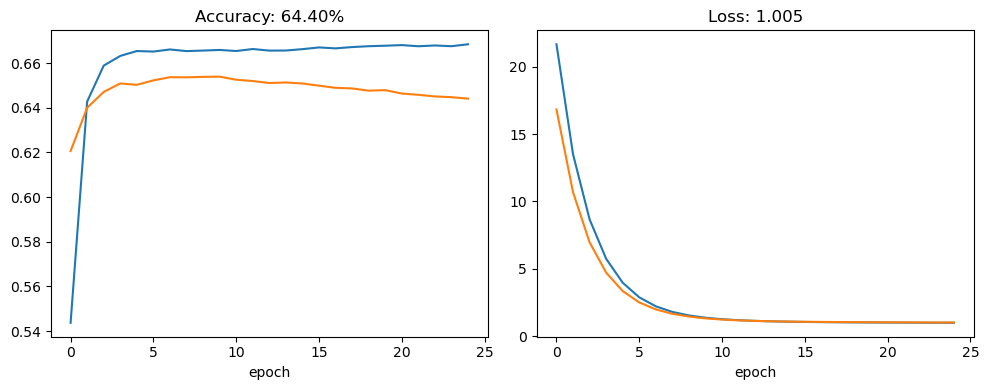

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

axes = axes.flatten()

axes[0].plot(history_2.history["sparse_categorical_accuracy"], label = "train accuracy")
axes[0].plot(history_2.history["val_sparse_categorical_accuracy"], label = "validation accuracy")
axes[0].set_xlabel("epoch")
axes[0].set_title("Accuracy: {:.2f}%".format(history_2.history["val_sparse_categorical_accuracy"][-1]*100))

axes[1].plot(history_2.history["loss"], label = "train loss")
axes[1].plot(history_2.history["val_loss"], label = "validation loss")
axes[1].set_xlabel("epoch")
axes[1].set_title("Loss: {:.3f}".format(history_2.history["val_loss"][-1]))

plt.tight_layout()
plt.show()

We can make the same observation with this model, but we have even a slightly worse precision. 

Let's try one last time with a model with 3 hidden layers and dropout layers between each of them. The first layer has 64 neurons and the second 128. Let's cross the fingers. 

In [13]:
layers_3 = Sequential()

layers_3.add(
    Dense(
        units = 64, 
        activation = activations.relu, 
        input_dim = 48, 
        kernel_initializer = initializers.VarianceScaling(scale = 2, seed = 0),
        kernel_regularizer = tf.keras.regularizers.l2(0.1),
        name = "first_layer"
    )
)

layers_3.add(Dropout(rate = 0.25, seed = 0, name = "dropout_layer_1"))

layers_3.add(
    Dense(
        units = 128, 
        activation = activations.relu, 
        kernel_initializer = initializers.VarianceScaling(scale = 2, seed = 0),
        kernel_regularizer = tf.keras.regularizers.l2(0.1),
        name = "second_layer"
    )
)

layers_3.add(Dropout(rate = 0.25, seed = 0, name = "dropout_layer_2"))

layers_3.add(
    Dense(
        units = 5, 
        activation = activations.softmax, 
        kernel_initializer = initializers.VarianceScaling(scale = 1, seed=0),
        kernel_regularizer = tf.keras.regularizers.l2(0.1),
        name = "output_layer"
    )
)   

In [14]:
layers_3.compile(optimizer = optimizers.SGD(learning_rate = (0.001)), 
                loss = losses.sparse_categorical_crossentropy, 
                metrics = metrics.sparse_categorical_accuracy)



In [15]:
history_3 = layers_3.fit(
    x=X_tr_rescaled,
    y = y_tr, 
    validation_split = 0.2, 
    batch_size = 128, 
    epochs = 25, 
    shuffle = True, 
    verbose = 0);

2026-01-20 14:58:41.823033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2026-01-20 14:58:44.910613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


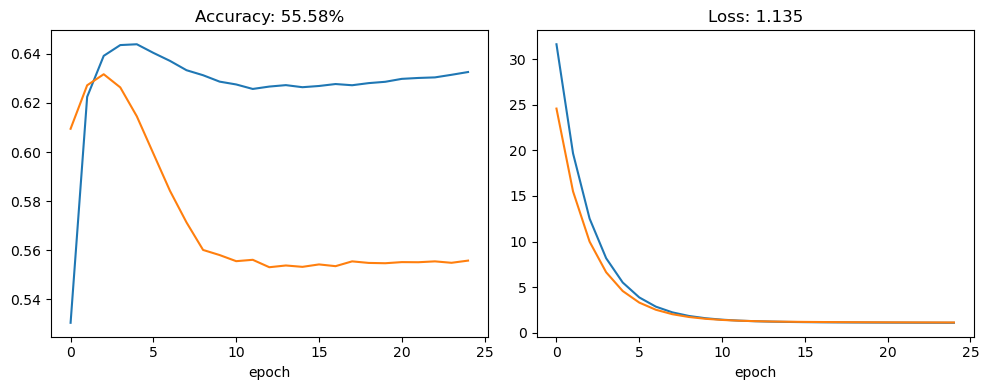

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

axes = axes.flatten()

axes[0].plot(history_3.history["sparse_categorical_accuracy"], label = "train accuracy")
axes[0].plot(history_3.history["val_sparse_categorical_accuracy"], label = "validation accuracy")
axes[0].set_xlabel("epoch")
axes[0].set_title("Accuracy: {:.2f}%".format(history_3.history["val_sparse_categorical_accuracy"][-1]*100))

axes[1].plot(history_3.history["loss"], label = "train loss")
axes[1].plot(history_3.history["val_loss"], label = "validation loss")
axes[1].set_xlabel("epoch")
axes[1].set_title("Loss: {:.3f}".format(history_3.history["val_loss"][-1]))

plt.tight_layout()
plt.show()

We see that the more complex the neuron network, the worst the accuracy. 

## C. Communication of the results

In [17]:
y_nn = model.predict(X_te_rescaled)
y_nn = np.argmax(y_nn, axis = 1)

2026-01-20 15:00:09.978776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
from codes.functions import class_report, confusion_matrix

class_report(y_te, y_nn)

              precision    recall  f1-score   support

           1       0.89      0.51      0.65      7391
           2       0.61      0.79      0.69     13699
           3       0.68      0.72      0.70     12292
           4       0.00      0.00      0.00      1759

    accuracy                           0.67     35141
   macro avg       0.55      0.51      0.51     35141
weighted avg       0.66      0.67      0.65     35141



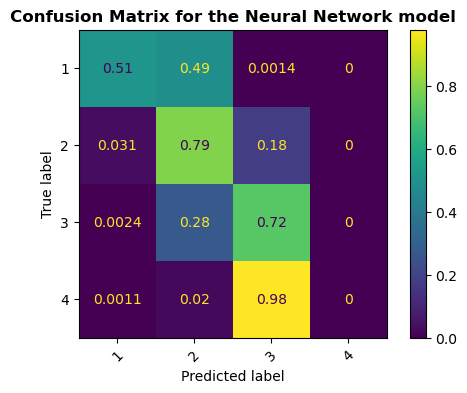

In [19]:
confusion_matrix(y_te, y_nn, "Neural Network")

We can see that the results of the Neuron Network are comparable with the ones of the Random Forest classifier, even a bit worse. 

## D. Saving test accuracy

In [21]:
acc_nn = (y_nn==y_te).sum()/len(y_te)
np.save("../scores & pca components/acc_nn", acc_nn)